Классификация изображений из датасета CIFAR-10

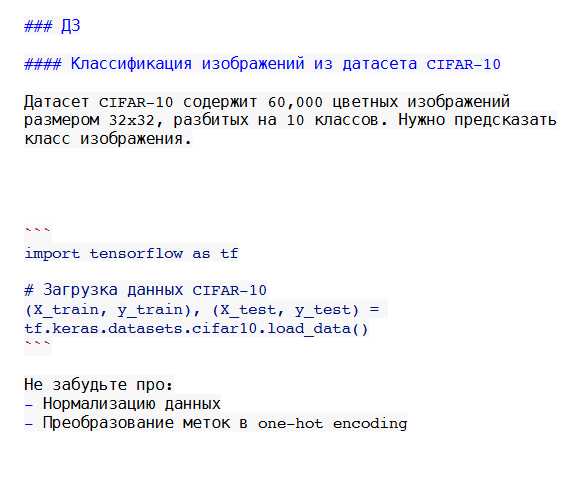

Импортируем библиотеки:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

Загружаем данные:

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Нормализуем данные, приводя их к диапазону от 0 до 1:

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Преобразуем метки в one-hot encoding

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Создаем модель:

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Компилируем модель:

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучаем модель:

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 127s 159ms/step - accuracy: 0.3088 - loss: 1.8665 - val_accuracy: 0.5446 - val_loss: 1.2486
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 158ms/step - accuracy: 0.5285 - loss: 1.3147 - val_accuracy: 0.6254 - val_loss: 1.0633
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 160ms/step - accuracy: 0.6020 - loss: 1.1283 - val_accuracy: 0.6439 - val_loss: 1.0313
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 158ms/step - accuracy: 0.6501 - loss: 0.9925 - val_accuracy: 0.7008 - val_loss: 0.8704
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - accuracy: 0.6895 - loss: 0.8913 - val_accuracy: 0.7178 - val_loss: 0.8124
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.7101 - loss: 0.8352 - val_accuracy: 0.7175 - val_loss: 0.8246
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 159ms/step - accuracy: 0.7321 - loss: 0.7704 - val_accuracy: 0.7368 - val_loss: 0.7715
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 156ms/step - accuracy: 0.7498 -

Выводим точность модели:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7624 - loss: 0.8646
Test accuracy: 0.7593


Точность модели составляет 76%.